In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import modules and utilities

In [9]:
%cd '/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization'
%pwd 

/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization


'/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization'

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from kmeansclustering import KMeansClustering

# Load sentences embeddings

In [ ]:
en_embedding_file = '/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization/data/en_embeddings.npy'
de_embedding_file = '/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization/data/de_embeddings.npy'

en_embeddings = np.load(en_embedding_file)
de_embeddings = np.load(de_embedding_file)
embeddings = np.concatenate((en_embeddings, de_embeddings), axis = 0) 

print('Shape of embeddings:', embeddings.shape)

Shape of embeddings: (328091, 512)


# Run k-means clustering

In [6]:
distortions = []
AICs = []
BICs = []
K = range(1, 31) # k = 1 to 30 are tested
for k in K:
  print('k = ', k)
  %time model = KMeansClustering(k, embeddings, is_mini_batch = False)
  
  np.save(str(k) + '_kmean_labels.npy', (model.km.labels_))
  
  distortions.append(model.km.inertia_)
  AICs.append(model.AIC)
  BICs.append(model.BIC)

  print('Number of iteration:', model.km.n_iter_)
  print()

np.save('kmean_inertia.npy', np.array(distortions))
np.save('kmean_aic.npy', np.array(AICs))
np.save('kmean_bic.npy', np.array(BICs))

k =  1
CPU times: user 33.6 s, sys: 15.1 s, total: 48.7 s
Wall time: 30.4 s
Number of iteration: 2

k =  2
CPU times: user 1min 10s, sys: 10.6 s, total: 1min 20s
Wall time: 1min 6s
Number of iteration: 14

k =  3
CPU times: user 2min 51s, sys: 15.1 s, total: 3min 6s
Wall time: 2min 43s
Number of iteration: 20

k =  4
CPU times: user 2min 35s, sys: 20.1 s, total: 2min 55s
Wall time: 2min 25s
Number of iteration: 27

k =  5
CPU times: user 3min 52s, sys: 25.1 s, total: 4min 17s
Wall time: 3min 38s
Number of iteration: 29

k =  6
CPU times: user 6min 36s, sys: 30.3 s, total: 7min 6s
Wall time: 6min 20s
Number of iteration: 60

k =  7
CPU times: user 5min 46s, sys: 35.8 s, total: 6min 22s
Wall time: 5min 26s
Number of iteration: 59

k =  8
CPU times: user 7min 44s, sys: 40.6 s, total: 8min 25s
Wall time: 7min 22s
Number of iteration: 86

k =  9
CPU times: user 6min 50s, sys: 45.1 s, total: 7min 35s
Wall time: 6min 24s
Number of iteration: 55

k =  10
CPU times: user 7min 43s, sys: 50.2 s, 

# Visualize clustering results

## Elbow Method

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(max_iter = 10000)
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(embeddings) 
visualizer.show() 

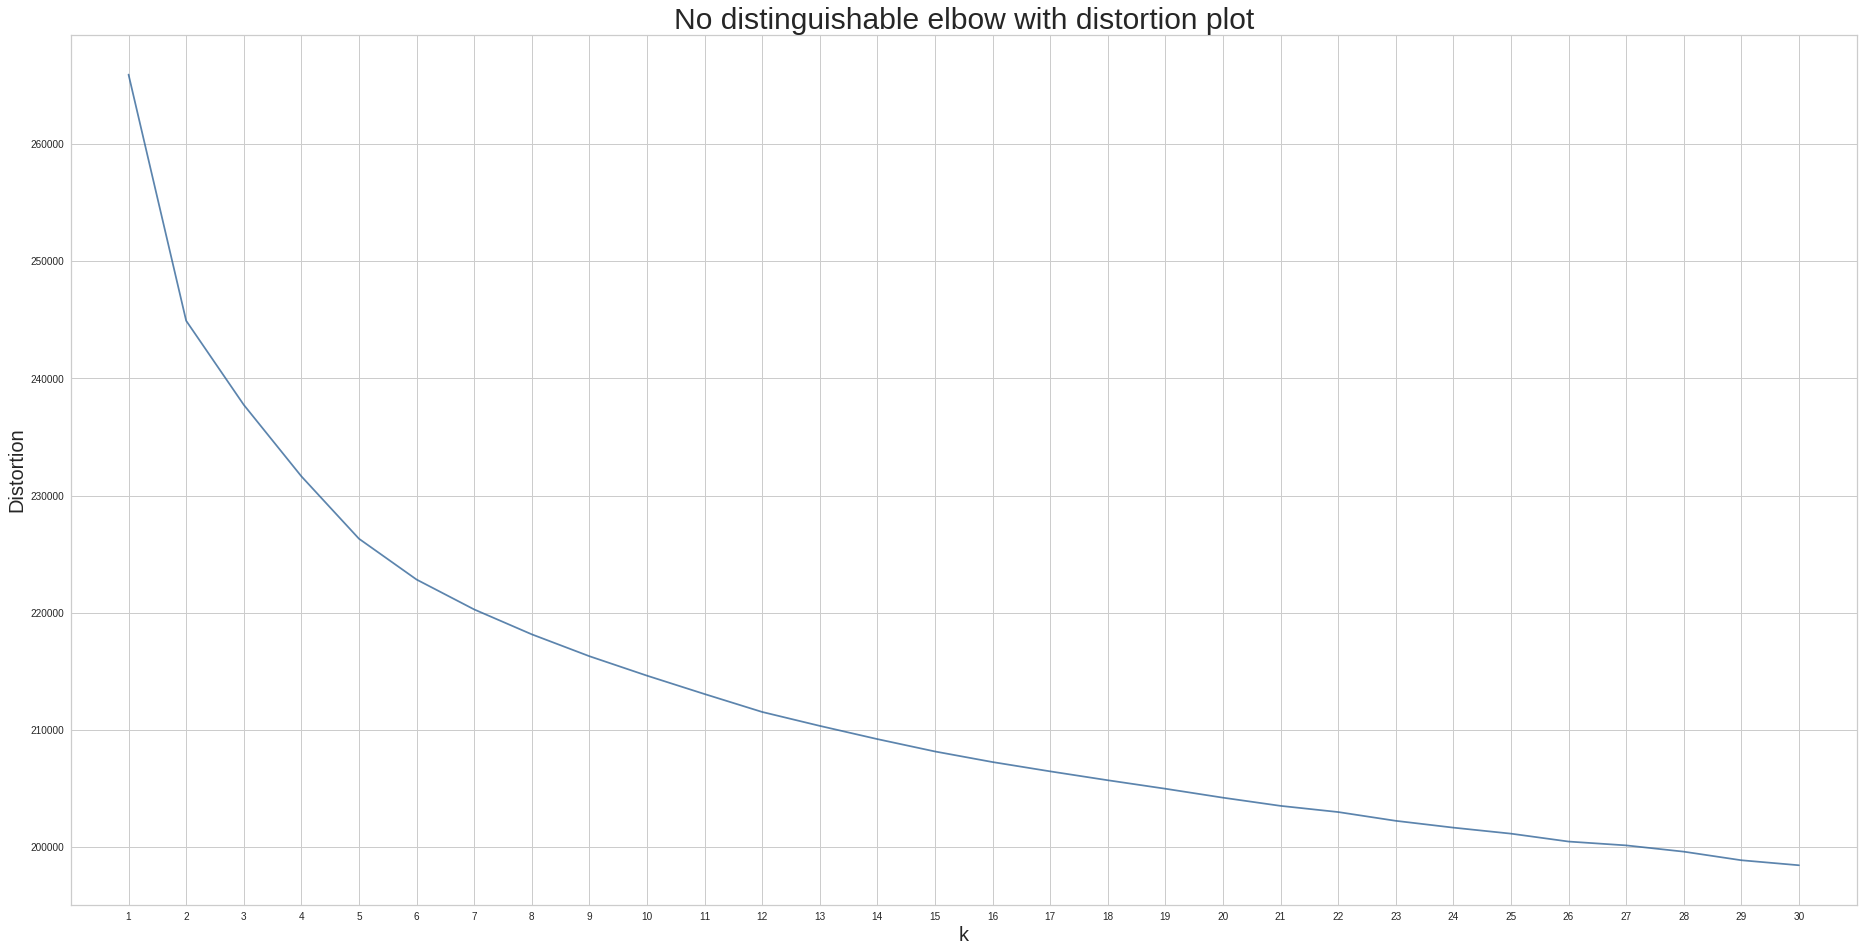

In [84]:
plt.figure(figsize = (32, 16))
plt.xticks(K)
plt.xlim(0, 31)
plt.plot(K, distortions, 'bx-', color = (0.2, 0.4, 0.6, 0.8))
plt.xlabel('k', fontsize = 20)
plt.ylabel('Distortion', fontsize = 20)
plt.title('No distinguishable elbow with distortion plot', fontsize = 30)
plt.show()

## Akaike Information Criterion (AIC)

In [60]:
# print the AICs for k = 13 to 20
print(K[12:19])
print(AICs[12:19])

range(13, 20)
[223668.90778012868, 223564.36087856477, 223533.5630074395, 223654.428929326, 223884.54752909095, 224150.9351285841, 224450.62267012423]


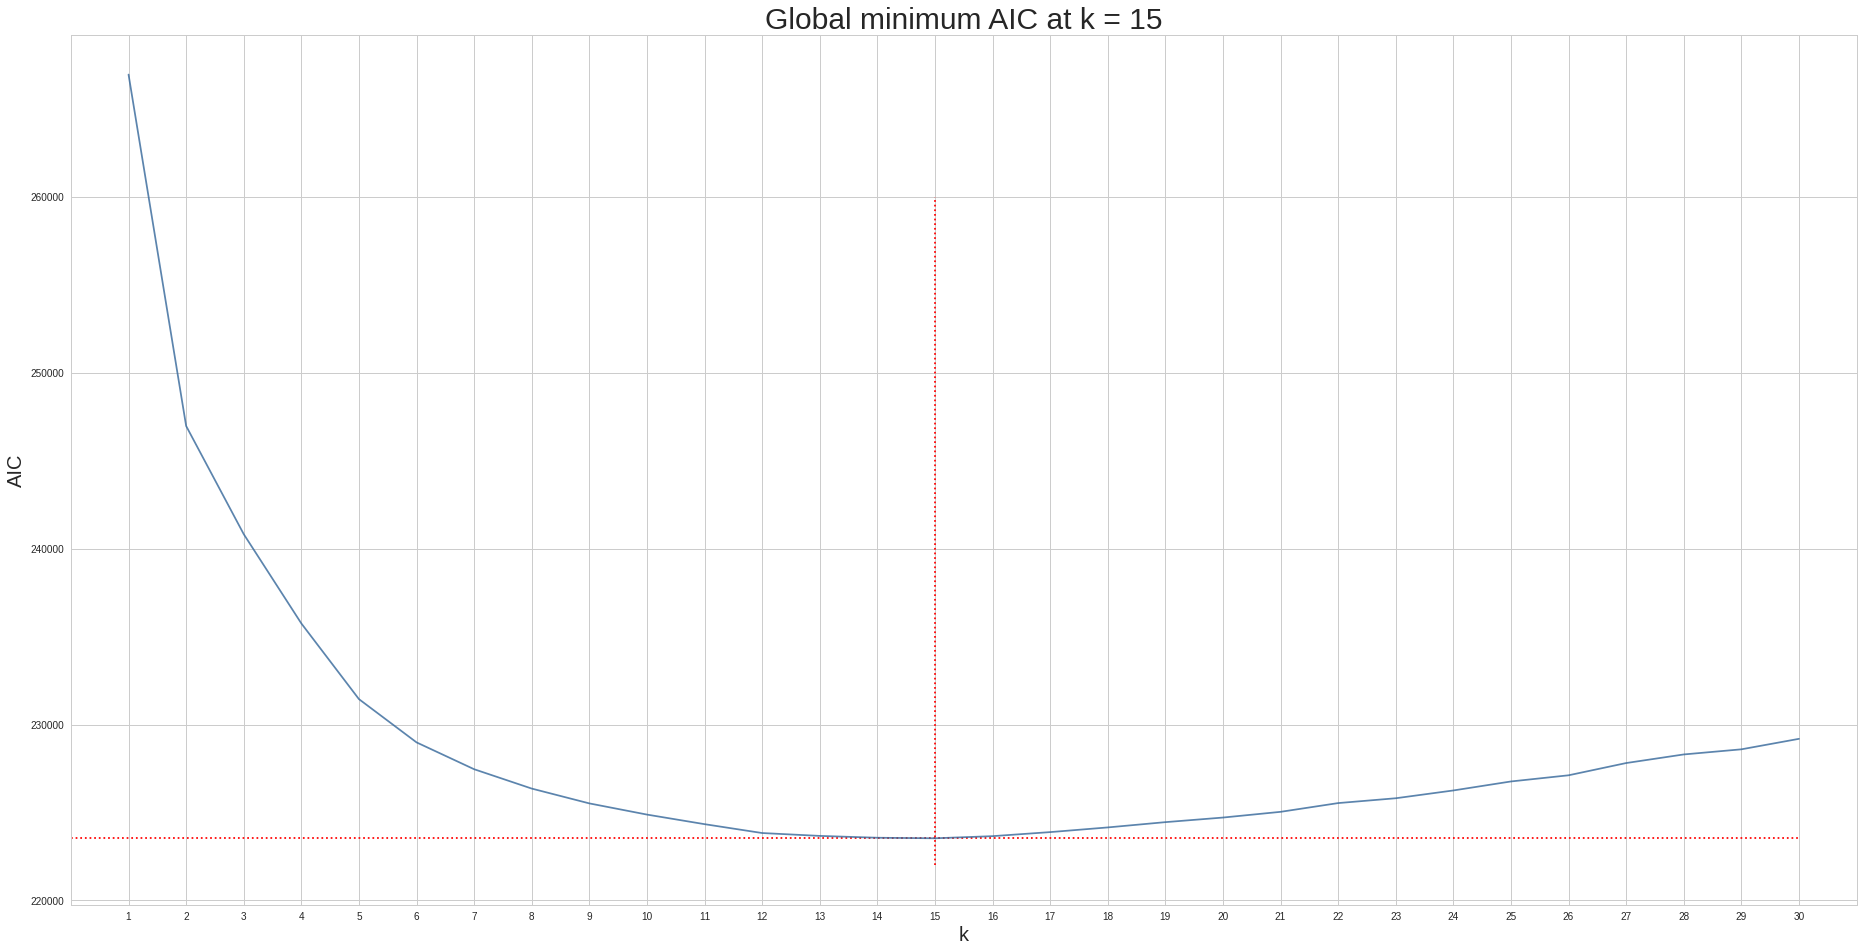

In [122]:
import seaborn as sns
plt.style.use('seaborn-whitegrid')

plt.figure(figsize = (32, 16))
plt.xticks(K)
plt.xlim(0, 31)
plt.plot(K, AICs, 'bx-', color = (0.2, 0.4, 0.6, 0.8))
plt.xlabel('k', fontsize = 20)
plt.ylabel('AIC', fontsize = 20)
plt.title('Global minimum AIC at k = 15', fontsize = 30)
plt.hlines(y = AICs[14], xmin = 0, xmax = 30, colors = 'red', linestyles = 'dotted')
plt.vlines(x = 15, ymin = 222000, ymax = 260000, colors = 'red', linestyles = 'dotted')
plt.show()

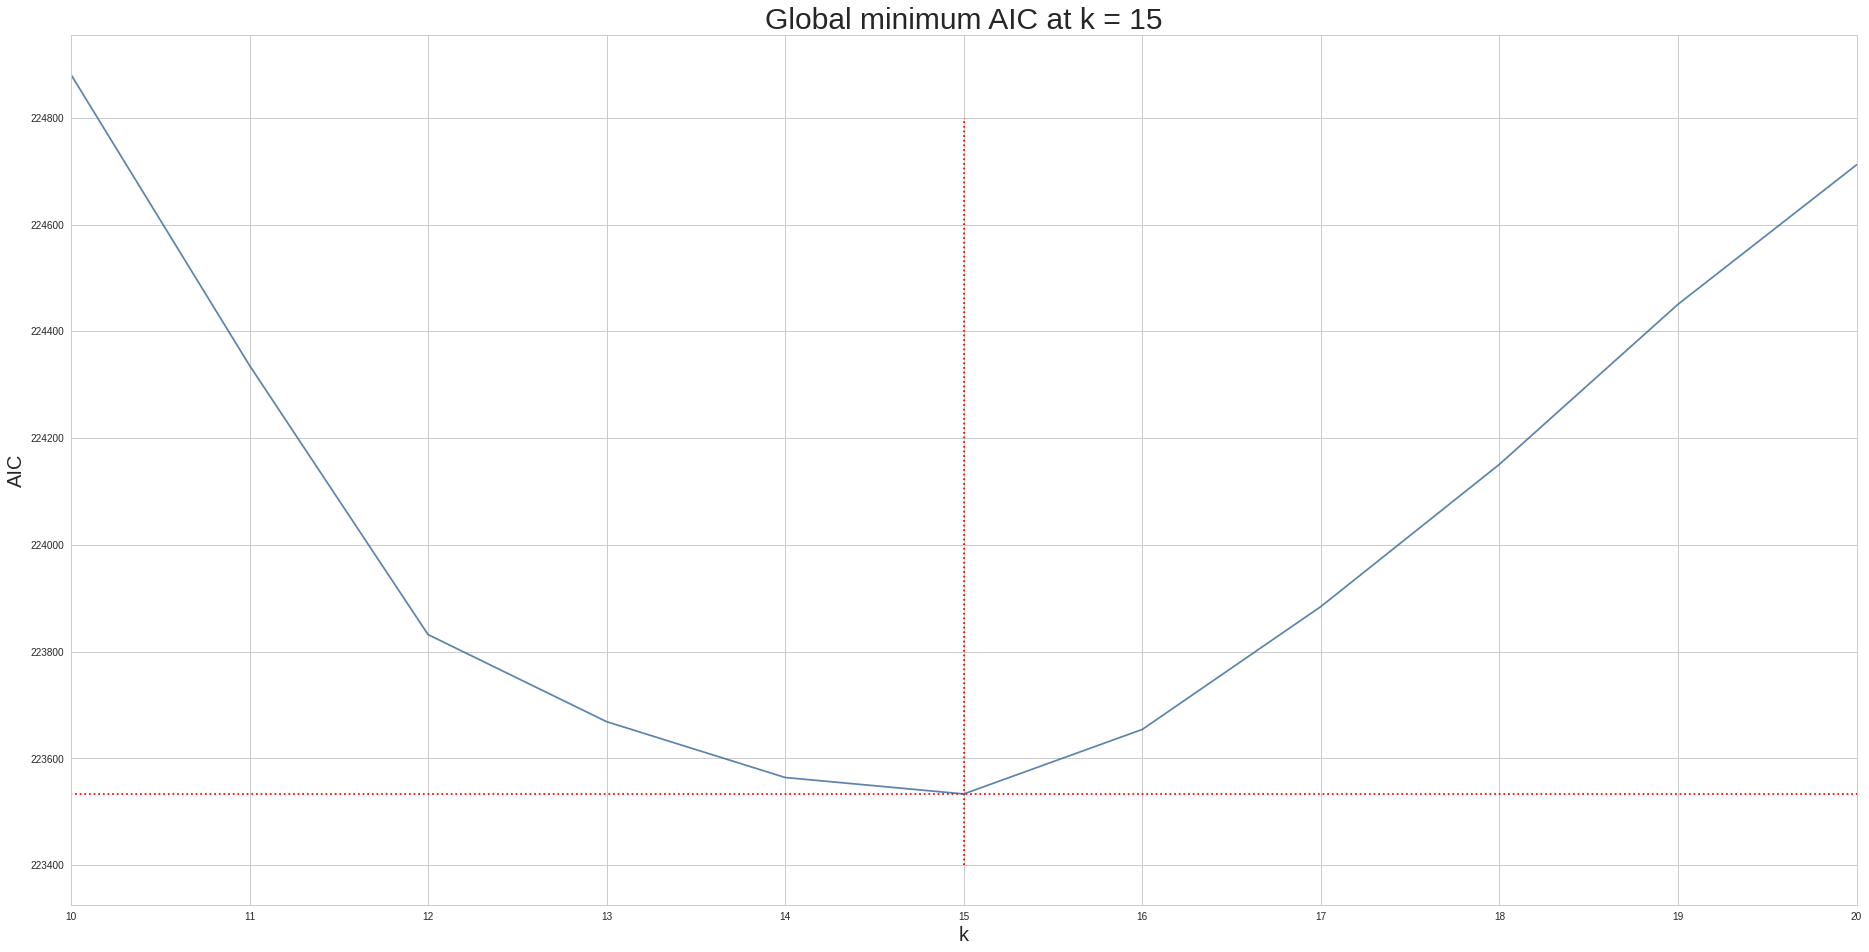

In [123]:
# import seaborn as sns
# plt.style.use('seaborn-darkgrid')

plt.figure(figsize = (32, 16))
plt.xticks(K)
plt.xlim(K[9], K[19])
plt.plot(K[9:20], AICs[9:20], 'bx-', color = (0.2, 0.4, 0.6, 0.8))
plt.xlabel('k', fontsize = 20)
plt.ylabel('AIC', fontsize = 20)
plt.title('Global minimum AIC at k = 15', fontsize = 30)
plt.hlines(y = AICs[14], xmin = 0, xmax = 30, colors = 'red', linestyles = 'dotted')
plt.vlines(x = 15, ymin = 223400, ymax = 224800, colors = 'red', linestyles = 'dotted')
plt.show()